<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_figure_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [5]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF =  
              10 s + 20
--------------------------------------
s^4 + 28 s^3 + 284 s^2 + 1232 s + 1920

Closed loop TF =  
              10 s + 20
--------------------------------------
s^4 + 28 s^3 + 284 s^2 + 1242 s + 1940

Poles =  [-10.90504988+0.j          -6.68771362+1.76153203j
  -6.68771362-1.76153203j  -3.71952289+0.j        ]
Zeros =  [-2.+0.j]


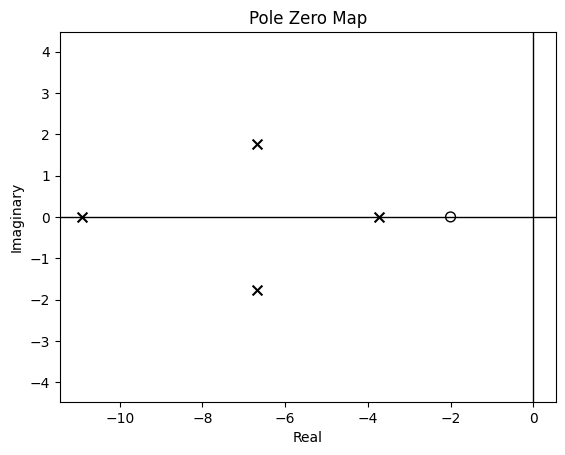

In [9]:
# Define your transfer function:
#G(s) = 10(s+2) / s(s+4)(s+6)(s+8)(s+10)

# Coefficients of the numerator
num = [10, 20]
# Coefficients of the denominator
den = np.polymul(np.polymul([1,4],[1,6]),np.polymul([1,8],[1,10]))

G = tf(num,den)
print ("Open loop TF = ", G)

# close loop transfer function
TF = feedback(G,1)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

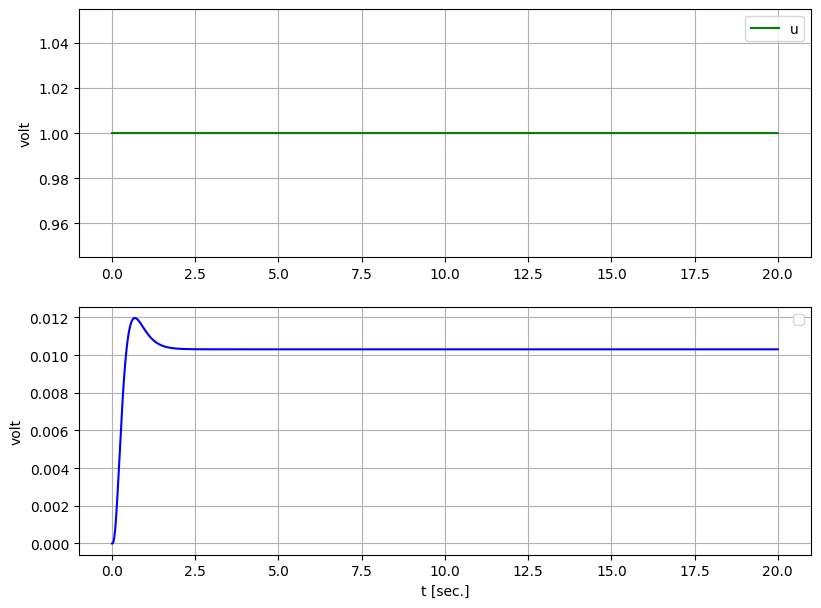

In [14]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.subplot(2,1,1)
plt.plot(t, u, "green")

plt.grid()
plt.legend(labels =("u"))
plt.ylabel("volt")

plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")